In [8]:
import numpy as np
import cv2

import sys
sys.path.append('../')
import V4pyutils as V4

import matplotlib.pyplot as plt
% matplotlib inline

Using Theano backend.
Using gpu device 0: GeForce GTX TITAN X (CNMeM is disabled, cuDNN 5103)
/opt/anaconda/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


In [121]:
def hsv_to_rgb(hue=0, sat=255, val=25):
    hsv = np.array([hue, sat, val])
    im = np.zeros((1,1,3))
    im[0, 0, :] = hsv
    im = im.astype(np.uint8)
    rgb = cv2.cvtColor(im, cv2.COLOR_HSV2RGB)
    return rgb[0, 0]

In [210]:
def show_tuning_as_color_strip(tune_art, tune_nat, neuron_name='neuron 1'):
    n_hues = tune_art.shape[0]
    im = 255. * np.ones((100, n_hues, 3))
    for hue, art_hue_fr in enumerate(tune_art):    
        norm_fr = art_hue_fr / np.max(tune_art) * 255
        for row in range(40):
            im[row, hue, :] = hsv_to_rgb(hue=hue/2, sat=255, val=norm_fr)

    for hue, nat_hue_fr in enumerate(tune_nat):    
        norm_fr = nat_hue_fr / np.max(tune_nat) * 255
        for row in range(40):
            im[60+row, hue, :] = hsv_to_rgb(hue=hue/2, sat=255, val=norm_fr)
        
    # Plot firing rate
    plt.imshow(im.astype(np.uint8), interpolation='none')
    plt.title(neuron_name)
    plt.axis('off')
    plt.show()

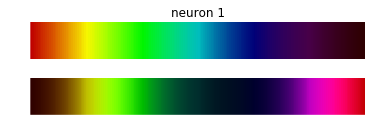

In [211]:
n_hues = 360
hues = np.arange(n_hues) / 180. * np. pi
hue_star= np.pi/2
tune_art = np.exp(np.cos(0.5 * (hues - hue_star)))
tune_nat = np.exp(np.cos(1.5 * (hues - hue_star)))
#tune_art = np.ones(n_hues)

show_tuning_as_color_strip(tune_art, tune_nat, neuron_name='neuron 1')

In [212]:
from sklearn.neighbors.kde import KernelDensity

In [213]:
kde = KernelDensity(kernel='gaussian')

In [ ]:
kde.fit()

In [214]:
N = 20
X = np.concatenate((np.random.normal(0, 1, 0.3 * N),
                    np.random.normal(5, 1, 0.7 * N)))[:, np.newaxis]

/opt/anaconda/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
/opt/anaconda/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


In [215]:
X.shape

(20, 1)

In [216]:
from statsmodels.nonparametric.smoothers_lowess import lowess

In [ ]:
lowess

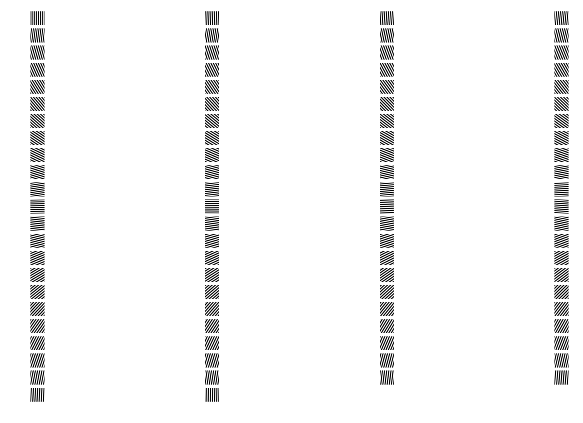

In [10]:
def make_sine_grating(n_pixels=224, theta=0, spatial_freq=0.03, phase=0):
    
    # Design the grating
    [x, y] = np.meshgrid(np.arange(n_pixels), np.arange(n_pixels))
    theta = 180. - theta
    x_theta = x * np.cos(theta / 180. * np.pi) + y * np.sin(theta / 180. * np.pi)
    y_theta = -x * np.sin(theta / 180. * np.pi) + y * np.cos(theta / 180. * np.pi)
    grating = (1. + np.cos(2 * np.pi * spatial_freq * x_theta + phase / 180. * np.pi))/ 2.
    
    # Make it into an image
    G = np.zeros((n_pixels, n_pixels, 3))
    G[:, :, 0] = grating * 255.
    G[:, :, 1] = grating * 255.
    G[:, :, 2] = grating * 255.    
    return np.uint8(G)


#angles = [0.,   22.,   45.,   67.,   90.,  112.,  135.,  157.]
angles = np.linspace(0., 179.0, num=90.)
phases = 360. * np.random.rand(90)
plt.figure(figsize=(12,7))

# Extract vgg features for oriented gratings
#Xgrating_vgg = list()
for a, ang in enumerate(angles):
    G = make_sine_grating(theta=angles[a], phase=phases[a])
    #G_for_vgg = V4.prepare_image_for_vgg(G)
    #Xgrating_vgg.append(np.squeeze(vgg_model.predict(G_for_vgg)))
    
    plt.subplot(23, 4, a + 1)
    plt.imshow(G, interpolation='none')
    plt.axis('off')
plt.show()
#Xgrating_vgg = np.array(Xgrating_vgg)